# Univariate Long Short-Term Memory for Stock Price Prediction ( 5 year Dataset)

### Importing the required libraries

Below are the libraries that are used to import data, graph plotting and Data Normalization

In [1]:
import scipy
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import tensorflow as tf

import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

%matplotlib inline 

In [2]:
tf.random.set_seed(456)

### Load the financial history price of APPL using Pandas Library

Loading the data into pandas data frame is certainly one of the most important steps as we can view the data value from the excel data set. We need to read the excel file into a dataframe and the job will done by pandas data frame

In [3]:
dataframe = pd.read_csv("AAPL_5Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (1136, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-15,39.002499,39.162498,38.762501,38.924999,36.848984,104038800
2017-05-16,38.985001,39.014999,38.680000,38.867500,36.794552,80194000
2017-05-17,38.400002,38.642502,37.427502,37.562500,35.559155,203070800
2017-05-18,37.817501,38.334999,37.782501,38.134998,36.101105,134272800
2017-05-19,38.345001,38.494999,38.157501,38.264999,36.224186,107843200
2017-05-22,38.500000,38.645000,38.227501,38.497501,36.444283,91865600
2017-05-23,38.724998,38.724998,38.327499,38.450001,36.399315,79675600
2017-05-24,38.459999,38.542500,38.167500,38.334999,36.290440,76712000
2017-05-25,38.432499,38.587502,38.257500,38.467499,36.415874,76942400


### Display the historical prices of APPL stock in graph

Use the plot with figsize to set the size of the figure to a certain size. The y-axis of the graph is set to Close_Prices to show the closing prices of the stock

<function matplotlib.pyplot.show(close=None, block=None)>

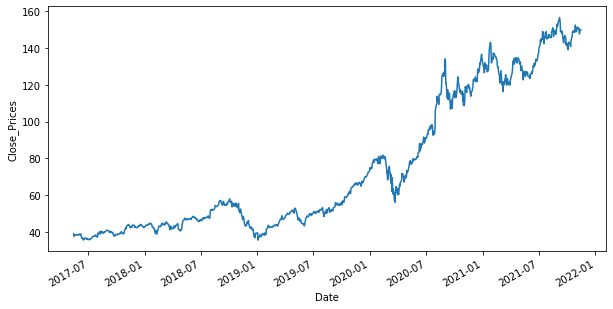

In [4]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

### Set the split boundary to split the dataset

The code in the cell below set the training_size into 70% of total length of dataset. Then, dataset is split into 70% of training data and 30% testing data

Dimension of train data:  (795, 6)
Dimension of test data:  (341, 6)


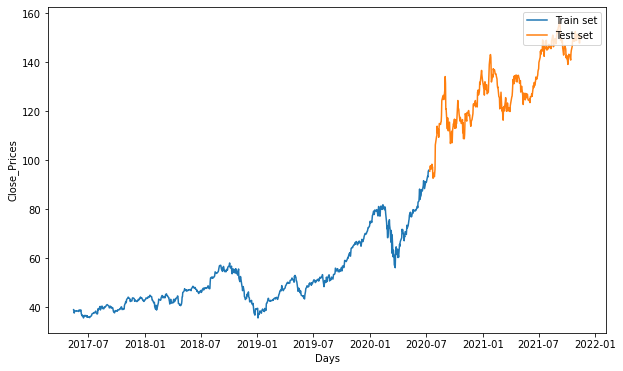

In [5]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

## The data are available in a pre-processed form. The preprocessing includes the following:
1. Noise Removal.
2. Data Normalization. 


### Noise Removal

Only the "close price" will be selected to form the training set and testing set

In [6]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset[['Close']]
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset[['Close']] 
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

         Close
0    38.924999
1    38.867500
2    37.562500
3    38.134998
4    38.264999
..         ...
790  93.462502
791  93.172501
792  95.342499
793  95.752502
794  95.919998

[795 rows x 1 columns]
          Close
0     95.477501
1     97.057503
2     97.724998
3     96.522499
4     96.327499
..          ...
336  150.809998
337  147.919998
338  147.869995
339  149.990005
340  150.000000

[341 rows x 1 columns]


### Data Normalization

Import the MinMaxScaler library from scikit-learn to perform the data normalization process. The value in each column will be translated into the range 0 and 1

In [7]:
#Different scaler for input and output
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

#Apply the scaler to test data
X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (795, 1)
Y_train_normalize.shape: (795, 1)
X_test_normalize.shape: (341, 1)
Y_test_normalize.shape: (341, 1)


In [8]:
print('X_train_normalize:\n', X_train_normalize)
print('Y_train_normalize:\n', Y_train_normalize)
print('X_test_normalize:\n', X_test_normalize)
print('Y_test_normalize:\n', Y_test_normalize)

X_train_normalize:
 [[5.59443152e-02]
 [5.49919113e-02]
 [3.33761083e-02]
 [4.28588700e-02]
 [4.50121849e-02]
 [4.88633094e-02]
 [4.80765273e-02]
 [4.61716533e-02]
 [4.83663613e-02]
 [4.72897286e-02]
 [4.75381861e-02]
 [4.37698974e-02]
 [4.55090834e-02]
 [5.49090756e-02]
 [4.86148022e-02]
 [5.07681171e-02]
 [5.45777989e-02]
 [5.30042678e-02]
 [2.81170746e-02]
 [1.33752791e-02]
 [1.82201839e-02]
 [1.22986465e-02]
 [8.69596300e-03]
 [3.31276674e-04]
 [1.71849443e-02]
 [1.16774696e-02]
 [1.52386939e-02]
 [1.42448970e-02]
 [1.69365034e-02]
 [1.50316956e-02]
 [6.37704284e-03]
 [1.50730721e-02]
 [6.16997836e-03]
 [7.57795392e-03]
 [5.42463897e-03]
 [7.86778788e-03]
 [2.23608442e-03]
 [8.24045757e-03]
 [1.18845175e-02]
 [1.38307846e-02]
 [1.47004024e-02]
 [2.31065480e-02]
 [2.83655155e-02]
 [3.05188305e-02]
 [3.26721454e-02]
 [3.65646629e-02]
 [3.37487780e-02]
 [3.34589441e-02]
 [4.09954553e-02]
 [4.36871114e-02]
 [4.66686180e-02]
 [3.46597889e-02]
 [3.02703895e-02]
 [2.70818350e-02]
 [3.2547

In [9]:
# Create a 3D input 
def create_3D_dataset(dataset, time_steps=1):
    X_dataset = []
    Y_dataset = []
    for i in range (len(dataset) - time_steps):
        V = dataset[i:(i+time_steps),0]
        X_dataset.append(V)
        Y_dataset.append(dataset[i+time_steps,0])
    return np.array(X_dataset), np.array(Y_dataset)

time_Steps = 30

X_train, Y_train = create_3D_dataset(X_train_normalize, time_Steps)
X_test, Y_test = create_3D_dataset(X_test_normalize, time_Steps)

print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (765, 30)
Y_train.shape: (765,)
X_test.shape: (311, 30)
Y_test.shape: (311,)


In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

Y_train = np.reshape(Y_train,(Y_train.shape[0],1))
Y_test = np.reshape(Y_test,(Y_test.shape[0],1))

print('Y_train.shape:', Y_train.shape)
print('Y_test.shape:', Y_test.shape)

X_train.shape: (765, 30, 1)
X_test.shape: (311, 30, 1)
Y_train.shape: (765, 1)
Y_test.shape: (311, 1)


### Import library required for Long Short-Term Memory

The code in this cell also create the LSTM model 

In [11]:
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

def create_LSTM_model(units):
    model = Sequential()
    model.add(LSTM(units = units, return_sequences=True,input_shape=[X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    #Compile model
    model.compile(loss = 'mse', optimizer = 'adam')
    return model

LSTM_model = create_LSTM_model(64)

In [12]:
# Fit BiLSTM, LSTM and GRU
def fit_model(model):
    #early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    record = model.fit(X_train, Y_train, epochs = 200, validation_split = 0.2, batch_size = 64,
                      shuffle = False)
    return record


print("\n\nLSTM_record")
LSTM_record = fit_model(LSTM_model)



LSTM_record
Epoch 1/200
10/10 [==============================] - 4s 109ms/step - loss: 0.0059 - val_loss: 0.0457
Epoch 2/200
10/10 [==============================] - 0s 29ms/step - loss: 0.0025 - val_loss: 0.0142
Epoch 3/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0025 - val_loss: 0.0068
Epoch 4/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 5/200
10/10 [==============================] - 0s 26ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 6/200
10/10 [==============================] - 0s 26ms/step - loss: 0.0015 - val_loss: 0.0041
Epoch 7/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 8/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 9/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 10/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0012 - v

Epoch 80/200
10/10 [==============================] - 1s 57ms/step - loss: 6.5485e-04 - val_loss: 0.0025e
Epoch 81/200
10/10 [==============================] - 1s 58ms/step - loss: 6.3161e-04 - val_loss: 0.0025
Epoch 82/200
10/10 [==============================] - 1s 57ms/step - loss: 7.2903e-04 - val_loss: 0.0017
Epoch 83/200
10/10 [==============================] - 1s 59ms/step - loss: 5.6047e-04 - val_loss: 0.0020
Epoch 84/200
10/10 [==============================] - 1s 58ms/step - loss: 6.3602e-04 - val_loss: 0.0021
Epoch 85/200
10/10 [==============================] - 1s 58ms/step - loss: 7.9061e-04 - val_loss: 0.0017
Epoch 86/200
10/10 [==============================] - 1s 59ms/step - loss: 6.2930e-04 - val_loss: 0.0027
Epoch 87/200
10/10 [==============================] - 1s 58ms/step - loss: 5.9334e-04 - val_loss: 0.0018
Epoch 88/200
10/10 [==============================] - 1s 66ms/step - loss: 5.4388e-04 - val_loss: 0.0016
Epoch 89/200
10/10 [==============================] - 

10/10 [==============================] - 1s 65ms/step - loss: 3.9880e-04 - val_loss: 0.0013
Epoch 158/200
10/10 [==============================] - 1s 68ms/step - loss: 4.4961e-04 - val_loss: 0.0016
Epoch 159/200
10/10 [==============================] - 1s 58ms/step - loss: 4.0962e-04 - val_loss: 0.0017
Epoch 160/200
10/10 [==============================] - 1s 57ms/step - loss: 4.7383e-04 - val_loss: 0.0015
Epoch 161/200
10/10 [==============================] - 1s 58ms/step - loss: 4.7286e-04 - val_loss: 0.0018
Epoch 162/200
10/10 [==============================] - 1s 58ms/step - loss: 3.9913e-04 - val_loss: 0.0014
Epoch 163/200
10/10 [==============================] - 1s 59ms/step - loss: 3.9003e-04 - val_loss: 0.0014
Epoch 164/200
10/10 [==============================] - 1s 59ms/step - loss: 4.4897e-04 - val_loss: 0.0014
Epoch 165/200
10/10 [==============================] - 1s 58ms/step - loss: 3.8130e-04 - val_loss: 0.0013
Epoch 166/200
10/10 [==============================] - 1s 58

In [13]:
# Make Prediction
def predict(model):
    prediction = model.predict(X_test)
    prediction = scaler_x_test.inverse_transform(prediction)
    return prediction


prediction_of_LSTM = predict(LSTM_model)
prediction_of_LSTM.shape

(311, 1)

In [14]:
Y_test_read = scaler_x_test.inverse_transform(Y_test) 
Y_train_read = scaler_x.inverse_transform(Y_train)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LSTM)

Actual Value

[[125.857498]
 [124.824997]
 [126.522499]
 [125.010002]
 [124.807503]
 [129.039993]
 [134.179993]
 [131.399994]
 [120.879997]
 [120.959999]
 [112.82    ]
 [117.32    ]
 [113.489998]
 [112.      ]
 [115.360001]
 [115.540001]
 [112.129997]
 [110.339996]
 [106.839996]
 [110.080002]
 [111.809998]
 [107.120003]
 [108.220001]
 [112.279999]
 [114.959999]
 [114.089996]
 [115.809998]
 [116.790001]
 [113.019997]
 [116.5     ]
 [113.160004]
 [115.080002]
 [114.970001]
 [116.970001]
 [124.400002]
 [121.099998]
 [121.190002]
 [120.709999]
 [119.019997]
 [115.980003]
 [117.510002]
 [116.870003]
 [115.75    ]
 [115.040001]
 [115.050003]
 [116.599998]
 [111.199997]
 [115.32    ]
 [108.860001]
 [108.769997]
 [110.440002]
 [114.949997]
 [119.029999]
 [118.690002]
 [116.32    ]
 [115.970001]
 [119.489998]
 [119.209999]
 [119.260002]
 [120.300003]
 [119.389999]
 [118.029999]
 [118.639999]
 [117.339996]
 [113.849998]
 [115.169998]
 [116.029999]
 [116.589996]
 [119.050003]
 [122.720001]
 [123.

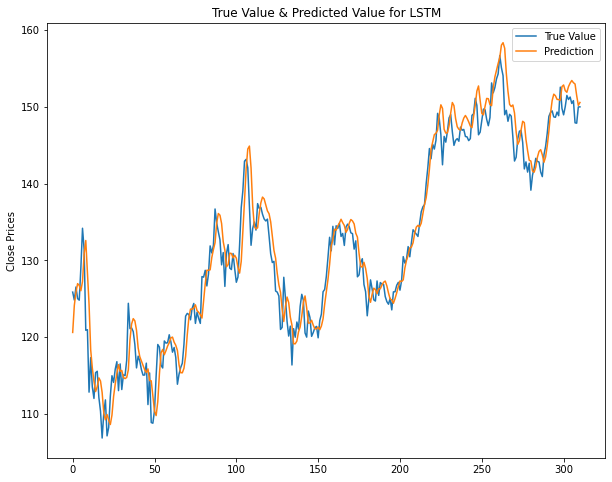

In [15]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    
plot_result(prediction_of_LSTM, Y_test_read, 'LSTM')

### Calculate the performance metrics

The Mean Square Error, Root Mean Square Error, Mean Absolute Error and R-square is calculated in this function

In [16]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read, prediction_of_LSTM, "5-year",'Univariate LSTM') 

This prediction model is: Univariate LSTM
The size of dataset is: 5-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 8.5685
Root Mean Square Error (RMSE) = 2.9272
Mean Absolute Error (MAE)     = 2.2158
+-----------------------------+--------+
